<a href="https://colab.research.google.com/github/Disha-16/Deforestation_analysis/blob/main/Deforestation_analysis(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/deforestation dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/deforestation dataset/goal15.forest_shares.csv
/content/drive/MyDrive/deforestation dataset/Untitled0.ipynb


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv('/content/drive/MyDrive/deforestation dataset/goal15.forest_shares.csv')

In [9]:
data.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3c         237 non-null    object 
 1   forests_2000  237 non-null    float64
 2   forests_2020  237 non-null    float64
 3   trend         227 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB


Top 10 countries with most forest coverage in 2020

In [11]:
sorted_data = data.sort_values('forests_2020', ascending=False)

top_10_most = sorted_data.head(10)
sorted_data_trend = data.sort_values('trend', ascending=False)

top_10_gained = sorted_data_trend.head(10)

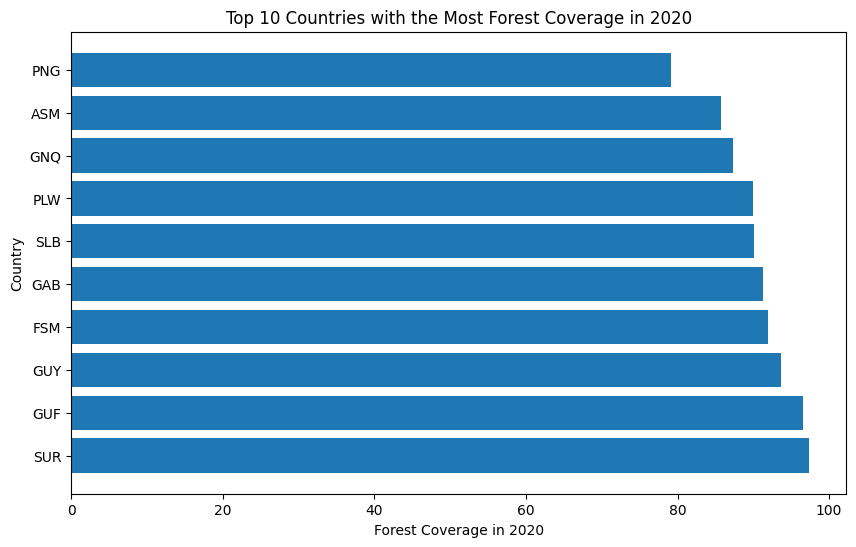

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_most['iso3c'], top_10_most['forests_2020'])
plt.xlabel('Forest Coverage in 2020')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Forest Coverage in 2020')


plt.show()

Top countries with largest gains in forest coverage

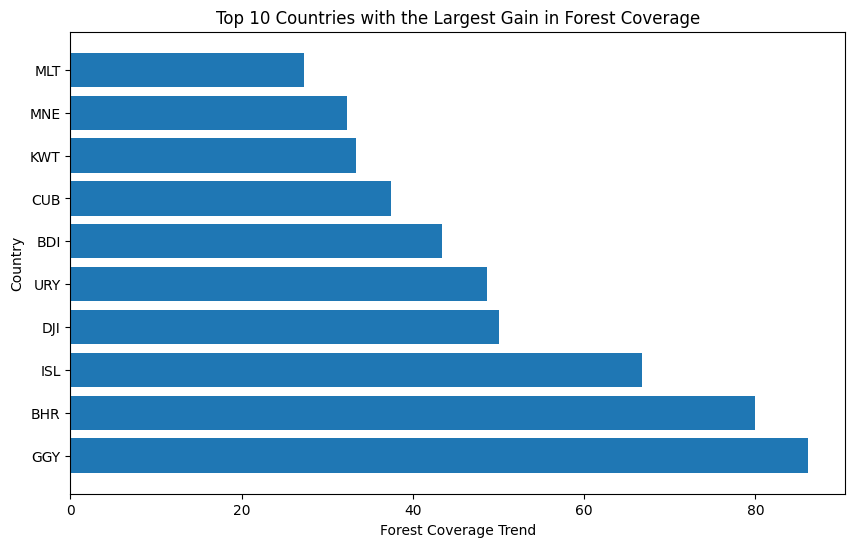

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_gained['iso3c'], top_10_gained['trend'])
plt.xlabel('Forest Coverage Trend')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Largest Gain in Forest Coverage')
plt.show()

Forest comparison 2000 vs 2020

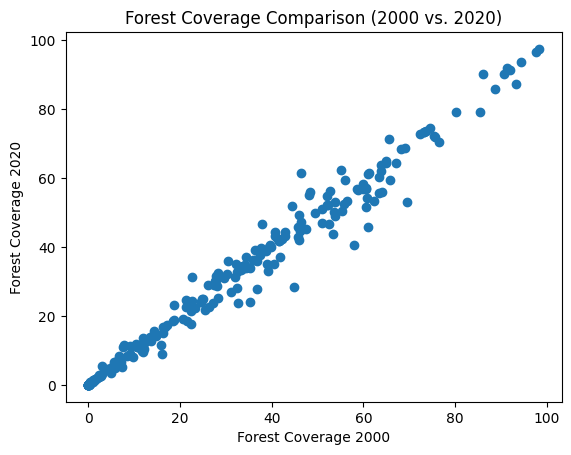

In [14]:
plt.scatter(data['forests_2000'], data['forests_2020'])
plt.xlabel('Forest Coverage 2000')
plt.ylabel('Forest Coverage 2020')
plt.title('Forest Coverage Comparison (2000 vs. 2020)')
plt.show()

Distribution of forest boxplot

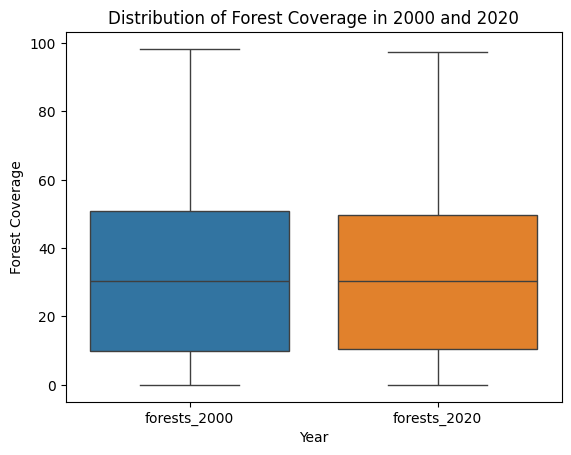

In [15]:
sns.boxplot(data=data[['forests_2000', 'forests_2020']])
plt.xlabel('Year')
plt.ylabel('Forest Coverage')
plt.title('Distribution of Forest Coverage in 2000 and 2020')
plt.show()

heatmap

<ipython-input-16-145d8b1d8ef7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


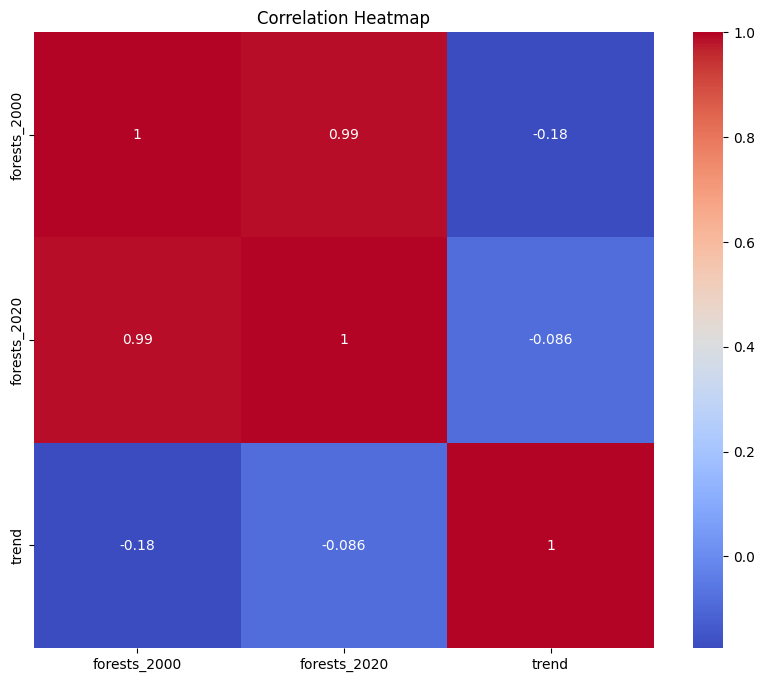

In [16]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Violin plot

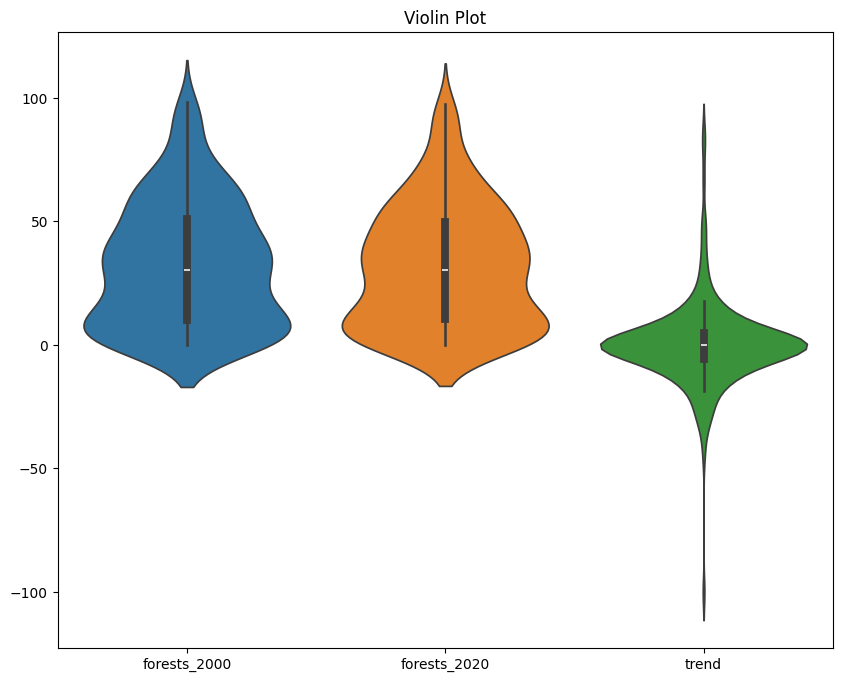

In [17]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=data[['forests_2000', 'forests_2020', 'trend']])
plt.title('Violin Plot')
plt.show()

Comparison of forest coverage 2000 vs 2020

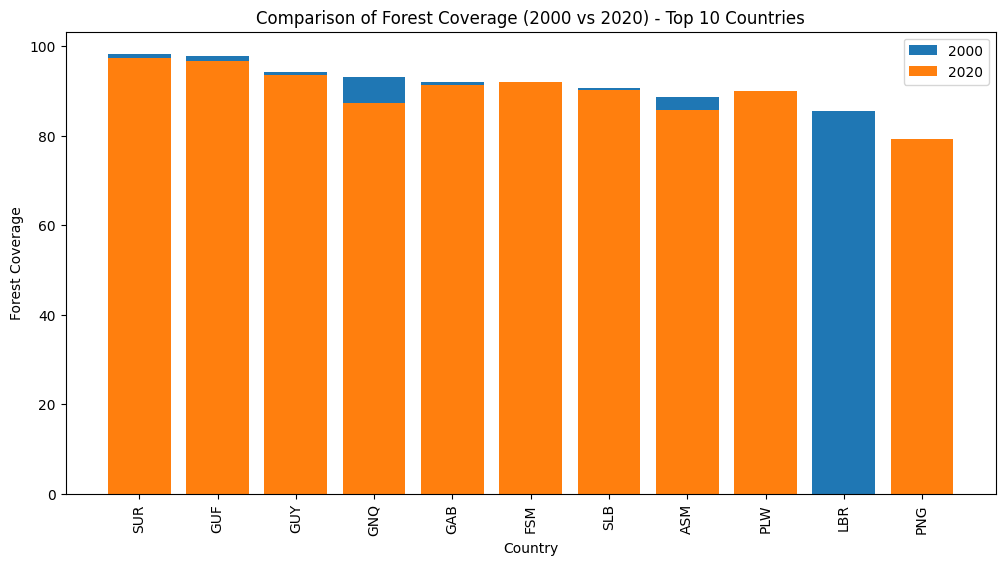

In [18]:
top_10_countries_2000 = data.nlargest(10, 'forests_2000')
top_10_countries_2020 = data.nlargest(10, 'forests_2020')

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries_2000['iso3c'], top_10_countries_2000['forests_2000'], label='2000')
plt.bar(top_10_countries_2020['iso3c'], top_10_countries_2020['forests_2020'], label='2020')
plt.xlabel('Country')
plt.ylabel('Forest Coverage')
plt.title('Comparison of Forest Coverage (2000 vs 2020) - Top 10 Countries')
plt.legend()
plt.xticks(rotation=90)
plt.show()

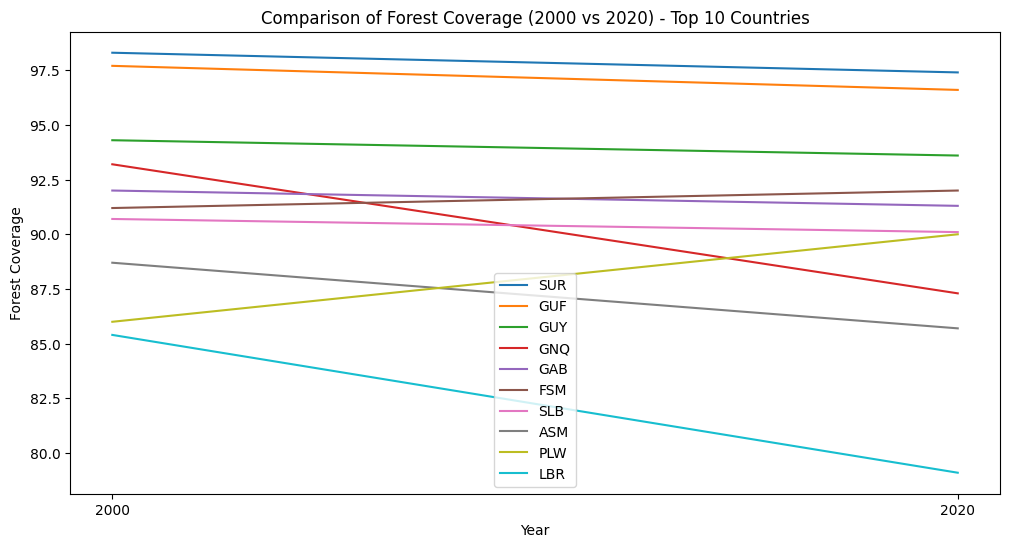

In [19]:
plt.figure(figsize=(12, 6))
for country in top_10_countries_2000['iso3c']:
    plt.plot(['2000', '2020'], [data[data['iso3c'] == country]['forests_2000'].values[0],
                                data[data['iso3c'] == country]['forests_2020'].values[0]],
             label=country)

plt.xlabel('Year')
plt.ylabel('Forest Coverage')
plt.title('Comparison of Forest Coverage (2000 vs 2020) - Top 10 Countries')
plt.legend()
plt.show()

Training model to predict trend

In [21]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
import lightgbm as lgb

In [23]:
X = data[['forests_2000', 'forests_2020']]
y = data['trend']

In [24]:
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))

In [25]:
X

,forests_2000,forests_2020
0,1.9,1.9
1,28.1,28.8
2,0.7,0.8
3,88.7,85.7
4,34.0,34.0
...,...,...
232,2.5,2.5
233,31.9,31.2
234,1.0,1.0
235,63.3,60.3


In [26]:
len(y)

237

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

using different models

In [28]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
}

Visualization

Results for Linear Regression:
Mean Squared Error: 55.558727810038796
R-squared Score: 0.6741237019520376


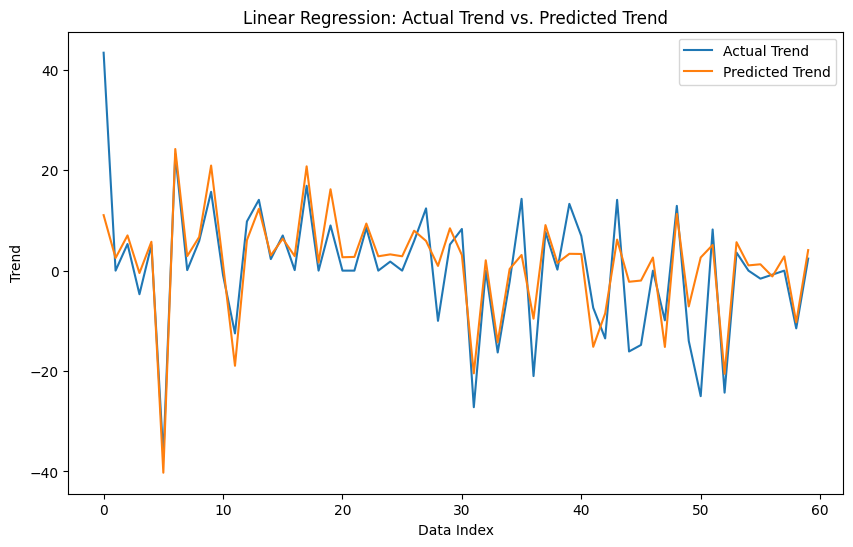


Results for Decision Tree:
Mean Squared Error: 225.77566666666672
R-squared Score: -0.3242732751945765


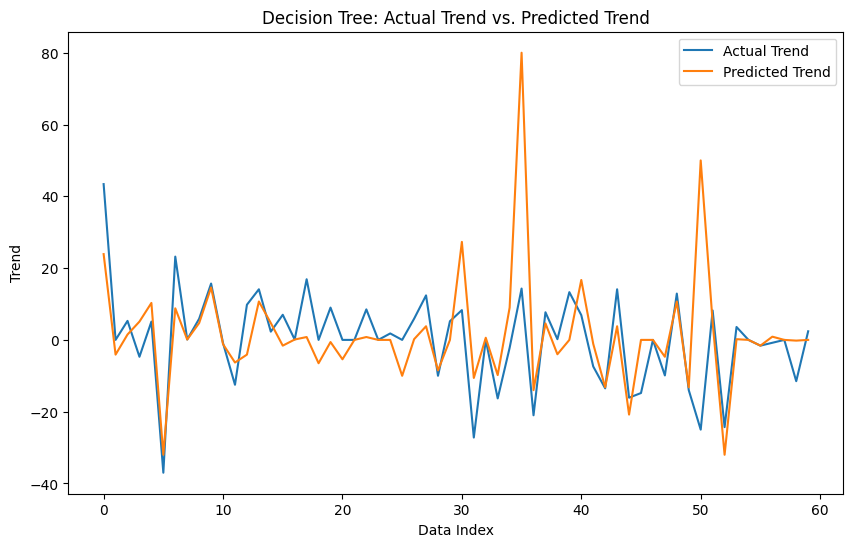

<ipython-input-29-82aaccffd89d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Results for Random Forest:
Mean Squared Error: 138.94872383333333
R-squared Score: 0.18500481335510743


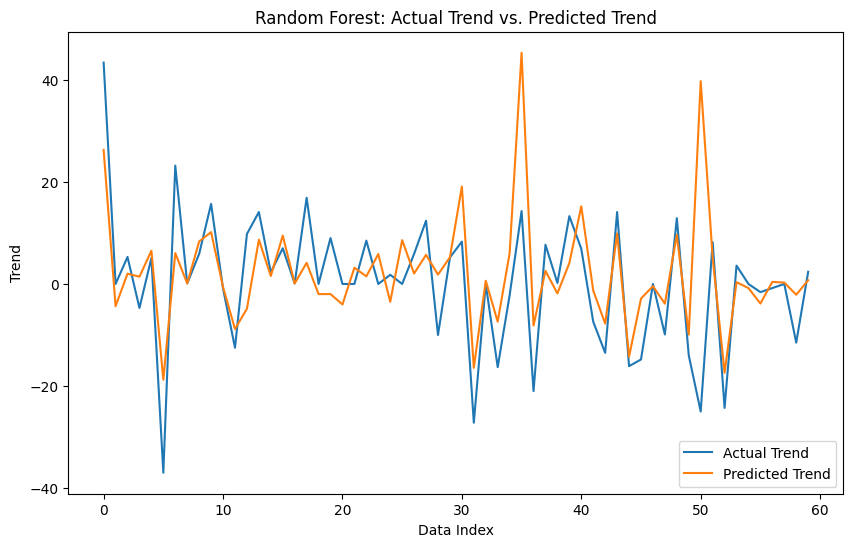


Results for SVR:
Mean Squared Error: 161.24851245951996
R-squared Score: 0.05420677583343669


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


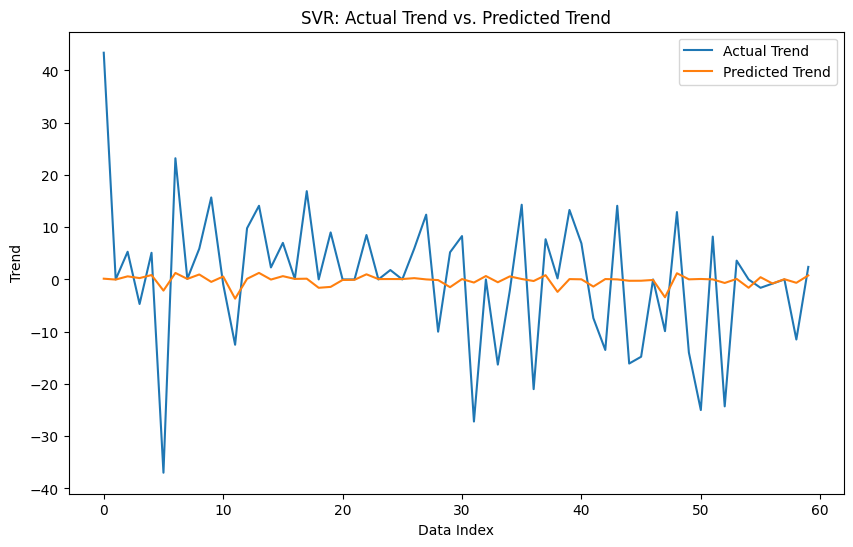


Results for XGBoost:
Mean Squared Error: 107.69211401855985
R-squared Score: 0.36833853422060836


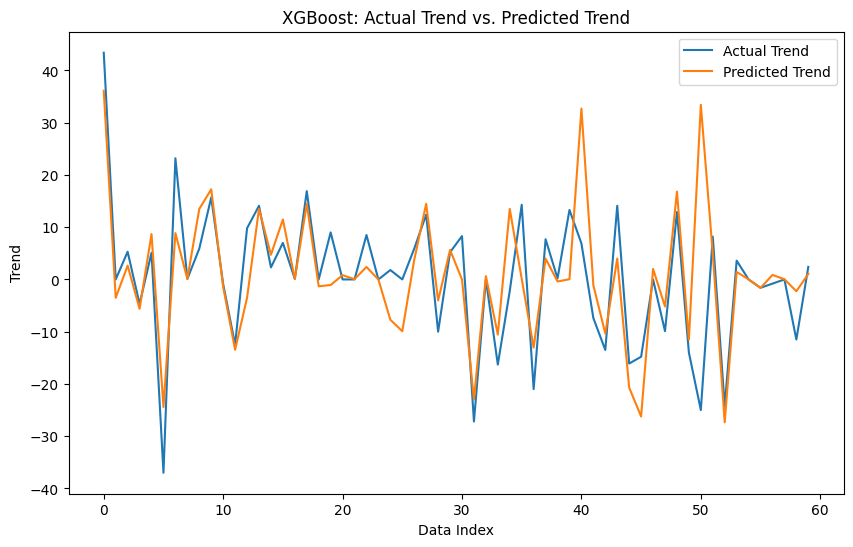


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 2
[LightGBM] [Info] Start training from score 0.067451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


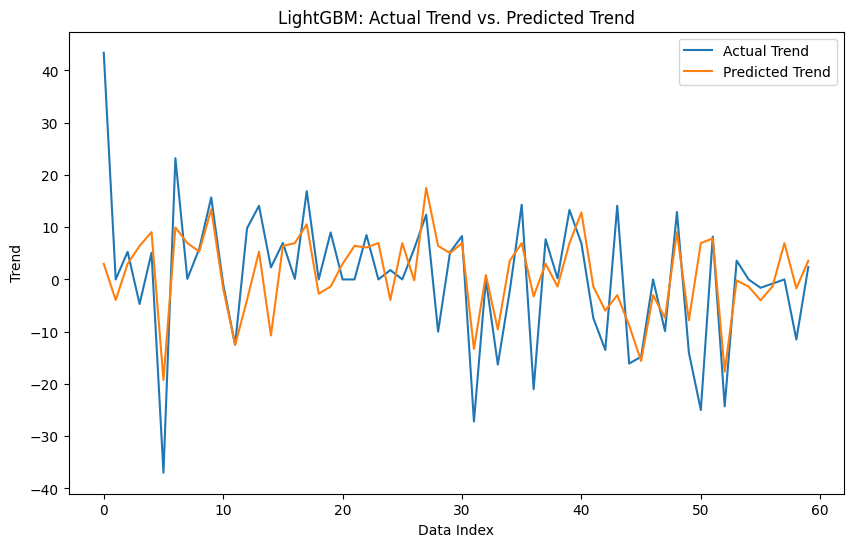


Results for Gradient Boosting Regressor:
Mean Squared Error: 179.29974041941483
R-squared Score: -0.05167159062058291


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


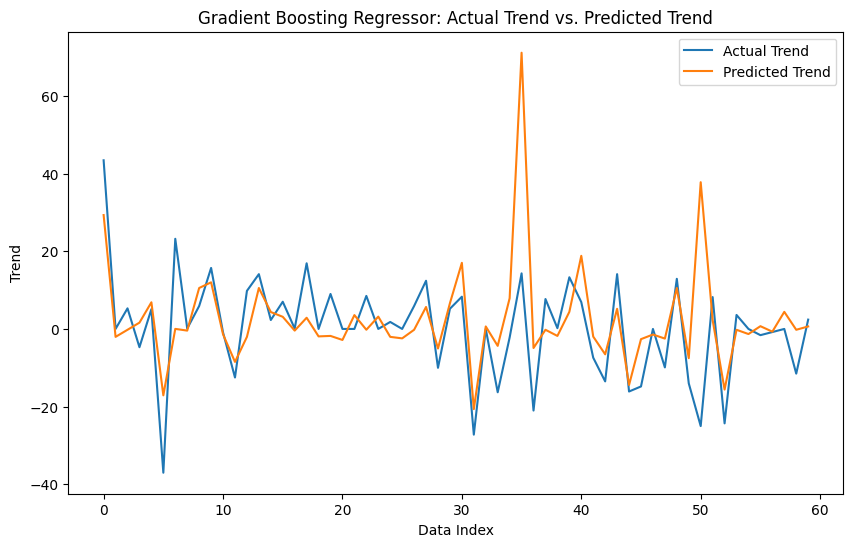


Results for ADA Boost:
Mean Squared Error: 233.98366898396867
R-squared Score: -0.37241680754248896


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


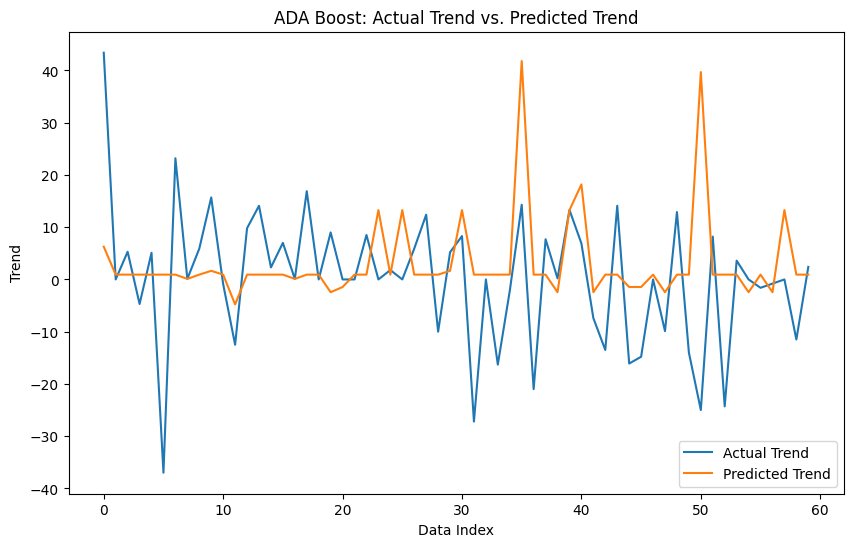


Results for K Neighbors Regressor:
Mean Squared Error: 137.99772666666664
R-squared Score: 0.19058282869748633


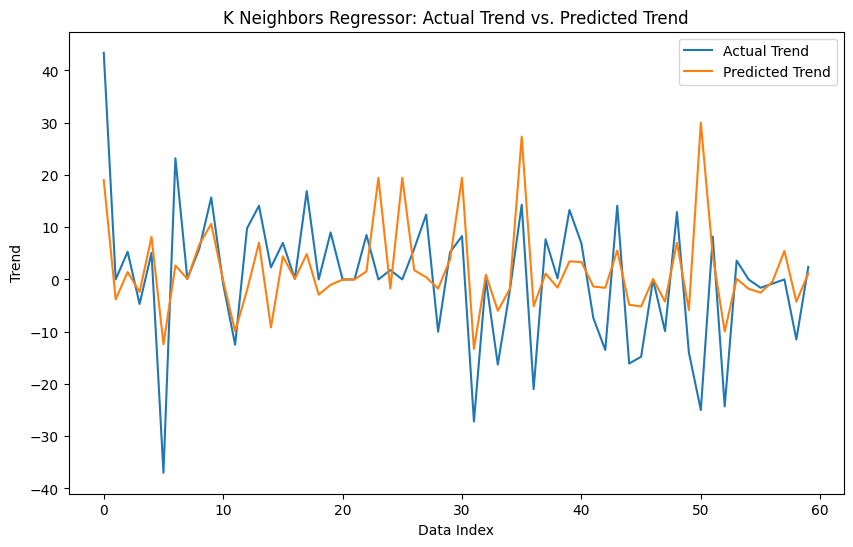


Results for Linear SVR:
Mean Squared Error: 61.17103418059627
R-squared Score: 0.6412050644014888


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


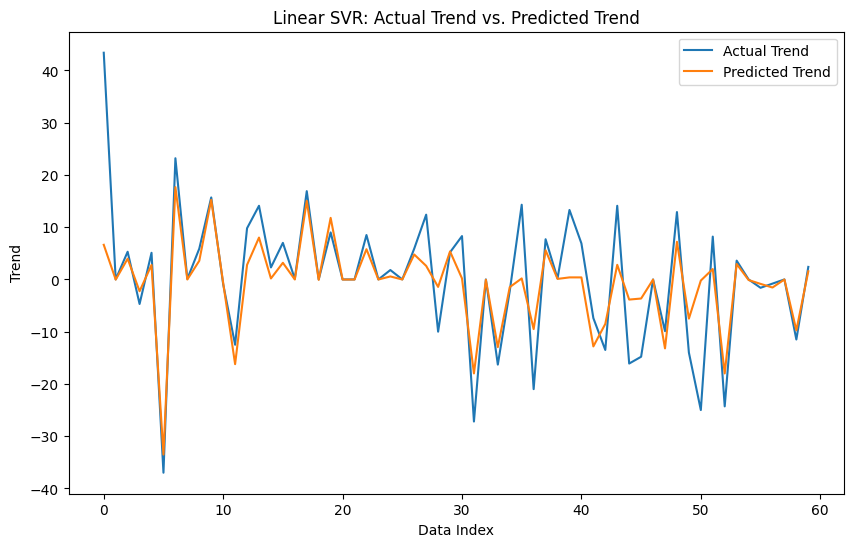

In [29]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Results for {name}:")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    accuracy.append(r2)
    print()

Accuracy

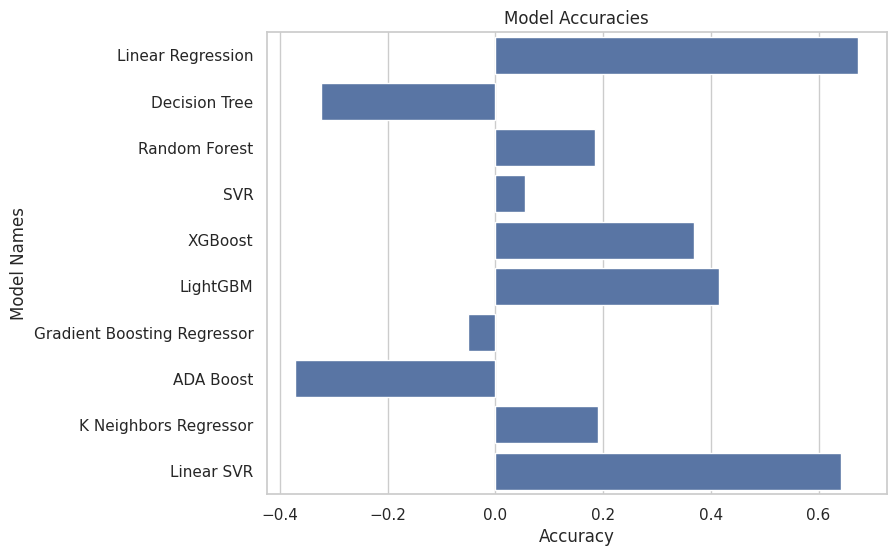

In [30]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="b")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()